# Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. The customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'.
## Test file: CSV containing the customer information for whom loan eligibility is to be predicted

# Data Dictionary

* Loan_ID:	Unique Loan ID
* Gender:	Male/ Female
* Married:	Marital status of applicant (Y/N)
* Dependents:	Number of dependents
* Education:	Applicant Education (Graduate/ Under Graduate)
* Self_Employed:	Self employed or Not (Y/N)
* ApplicantIncome	Income of applicant
* Coapplicant Income: Income of co-applicant
* LoanAmount:	Loan amount in thousands
* Loan_Amount_Term:	Term of loan in months
* Credit_History:	1 if credit history meets guidelines, 0 otherwise.
* Property_Area:	Urban/ Semi Urban/ Rural
* Loan_Status(Target): Loan approved (Y/N)

# Submission file format: 
* Loan_ID	Unique Loan ID
* Loan_Status	(Target) Loan approved (Y/N)

# Import the libraries

In [542]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load Data

In [544]:
train_df=pd.read_csv("C:\\Users\\Jyothy\\Downloads\\train_ctrUa4K.csv")
test_df=pd.read_csv("C:\\Users\\Jyothy\\Downloads\\test_lAUu6dG.csv")

# Display top 3 rows of dataset

In [546]:
train_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Unnamed: 13,Unnamed: 14
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN,NaN


In [547]:
test_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


# Removing columns, 'Loan_ID', 'Unnamed: 13' and 'Unnamed: 14'.

In [549]:
train_df.drop(['Loan_ID', 'Unnamed: 13', 'Unnamed: 14'],axis=1,inplace=True)

# Display last 2 rows of dataset

In [551]:
train_df.tail(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Find total number of rows and columns

In [553]:
print("No.of rows in train data:",train_df.shape[0])
print("No.of columns in train data:",train_df.shape[1])
print("No.of rows in test data:",test_df.shape[0])
print("No.of columns in test data:",test_df.shape[1])

No.of rows in train data: 614
No.of columns in train data: 12
No.of rows in test data: 367
No.of columns in test data: 12


# Check for duplicate rows

In [555]:
print("No.of duplicate rows in train data:",train_df.duplicated().sum())

No.of duplicate rows in train data: 0


In [556]:
print("No.of duplicate rows in test data:",test_df.duplicated().sum())

No.of duplicate rows in test data: 0


* ### There are no duplicate rows in train data. 
* ### There is one duplicate in the test data. The percentage of duplicate rows is negligible and removing it will affect the index of test data. So I am not removing it.

# Check for duplicate columns

In [559]:
train_df.columns.duplicated().sum()

0

In [560]:
test_df.columns.duplicated().sum()

0

* ### There are no duplicate columns

# Find data type of each column and memory usage

* ## Train Data:

In [564]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [565]:
#Columns_with_null_train_df= ['Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
#category_columns_train_df=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
#numerical_columns_train_df=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

### Display count of each category in categorical columns of train data

In [567]:
# Display the count of unique values in the column 'Married' 
print(train_df['Married'].value_counts())

Married
Yes    398
No     213
Name: count, dtype: int64


In [568]:
# Display the count of unique values in the column 'Dependents' 
print(train_df['Dependents'].value_counts())

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [569]:
# Display the count of unique values in the column 'Education' 
print(train_df['Education'].value_counts())

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [570]:
# Display the count of unique values in the column 'Self_Employed' 
print(train_df['Self_Employed'].value_counts())

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [571]:
# Display the count of unique values in the column 'Property_Area' 
print(train_df['Property_Area'].value_counts())

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [572]:
# Display the count of unique values in the column 'Loan_Status' 
print(train_df['Loan_Status'].value_counts())

Loan_Status
Y    422
N    192
Name: count, dtype: int64


* ## Test Data

In [574]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [575]:
#Columns_with_null_test_df= ['Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
#category_columns_test_df=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
#numerical_columns_test_df=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

### Display count of each category in categorical columns of test data

In [577]:
# Display the count of unique values in the column 'Married' 
print(test_df['Married'].value_counts())

Married
Yes    233
No     134
Name: count, dtype: int64


In [578]:
# Display the count of unique values in the column 'Dependents' 
print(test_df['Dependents'].value_counts())

Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64


In [579]:
# Display the count of unique values in the column 'Education' 
print(test_df['Education'].value_counts())

Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64


In [580]:
# Display the count of unique values in the column 'Self_Employed' 
print(test_df['Self_Employed'].value_counts())

Self_Employed
No     307
Yes     37
Name: count, dtype: int64


In [581]:
# Display the count of unique values in the column 'Property_Area' 
print(test_df['Property_Area'].value_counts())

Property_Area
Urban        140
Semiurban    116
Rural        111
Name: count, dtype: int64


# Handling the categorical variables

In [583]:
warnings.filterwarnings('ignore')# Suppress all warnings
categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Education', 'Property_Area']

mapping_dict = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
}

# Apply mappings to both train and test data
for feature in categorical_features:
    train_df[feature] = train_df[feature].replace(mapping_dict[feature]).infer_objects(copy=False) # Use infer_objects(copy=False) method to addressing data type change warning
    test_df[feature] = test_df[feature].replace(mapping_dict[feature]).infer_objects(copy=False) # Calling infer_objects(copy=False) on the returned value after replace tells Pandas to re-evaluate the data type based on the replaced values.
# Replace 'Loan_Status' only in the training data
loan_mapping = {"Y": 1, "N": 0}
train_df['Loan_Status'] = train_df['Loan_Status'].replace(loan_mapping).infer_objects(copy=False)

In [584]:
#train_df.head()

In [585]:
# print(train_df.dtypes)
# print(train_df.dtypes)

# Check nulll values in each column

In [587]:
#train_df.isnull().sum()

In [588]:
#test_df.isnull().sum()

# Percentage of null values in each column

In [590]:
train_df.isnull().sum()/train_df.shape[0]*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [591]:
test_df.isnull().sum()/test_df.shape[0]*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

# Check for missing values visually

<Axes: >

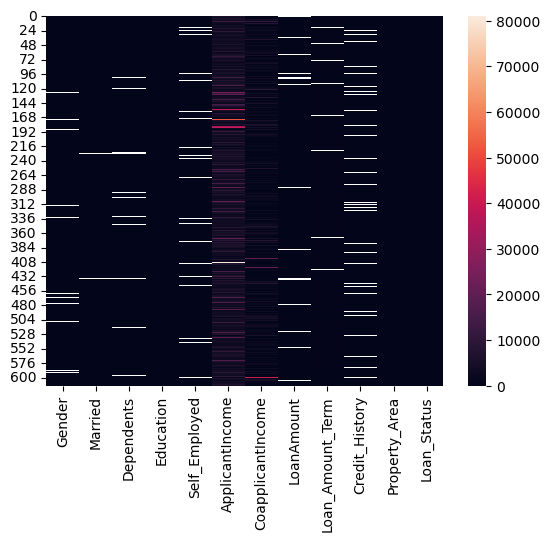

In [593]:
sns.heatmap(data=train_df)

<Axes: >

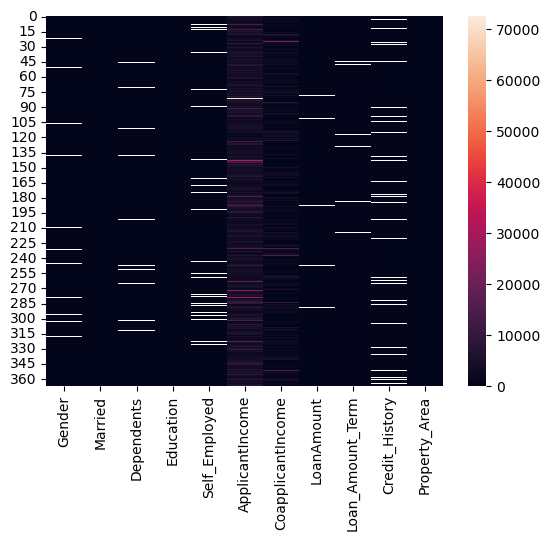

In [594]:
sns.heatmap(data=test_df.drop(['Loan_ID'],axis=1))

# Imputation

* ### Train data: Filling categorical data

In [597]:
# """
# Fills missing values in 'credit_history' based on 'loan_status':(1, 1) and (0, 0)
# """
# def fill_credit_history(cols):
#     history=cols.iloc[0]
#     status=cols.iloc[1]
#     if pd.isnull(history):
#         if status=='1': 
#             return 1
#         elif status=='0': 
#             return 0
#     else:
#         return history

# train_df['Credit_History'] = train_df[['Credit_History','Loan_Status']].apply(fill_credit_history, axis=1)
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0])
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

In [598]:
cols_to_fill_train_data= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
# In categorical columns ill missing values with mode 
for col in cols_to_fill_train_data:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0]) # using index to choose first mode in case of multimodel columns

#display(train_df) 

* ### Train data: Filling numerical data

In [600]:
cols_to_fill_train_data= ['LoanAmount','Loan_Amount_Term']
# In categorical columns fill missing values with mode 
for col in cols_to_fill_train_data:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0]) # using index to choose first mode in case of multimodel columns

#display(train_df) 

In [601]:
train_df.isnull().sum() # Again checking null values in train data

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* ### Test data: FIlling categorical data

In [603]:
cols_to_fill_test_data= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
# Fill missing values with mode for categorical columns
for col in cols_to_fill_test_data:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0]) # using index to choose first mode in case of multimodel columns

#display(train_df) 

* ### Test data: Filling numerical data

In [605]:
cols_to_fill_train_data= ['LoanAmount','Loan_Amount_Term','Credit_History']
# In categorical columns ill missing values with mode 
for col in cols_to_fill_train_data:
    test_df[col] = test_df[col].fillna(train_df[col].mode()[0]) # using index to choose first mode in case of multimodel columns

#display(train_df) 

In [606]:
test_df.isnull().sum() # Again checking null values in train data

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Check number of rows and columns again

In [608]:
train_df.shape

(614, 12)

In [609]:
test_df.shape

(367, 12)

# Get overall statistics

In [611]:
train_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [612]:
test_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.806540,0.771117,0.100817,4805.599455,1569.577657,135.912807,342.822888,0.839237,1.079019
std,0.393417,0.482122,1.065177,0.420687,0.301498,4910.685399,2334.232099,60.974805,64.658402,0.367814,0.824337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000


<Axes: >

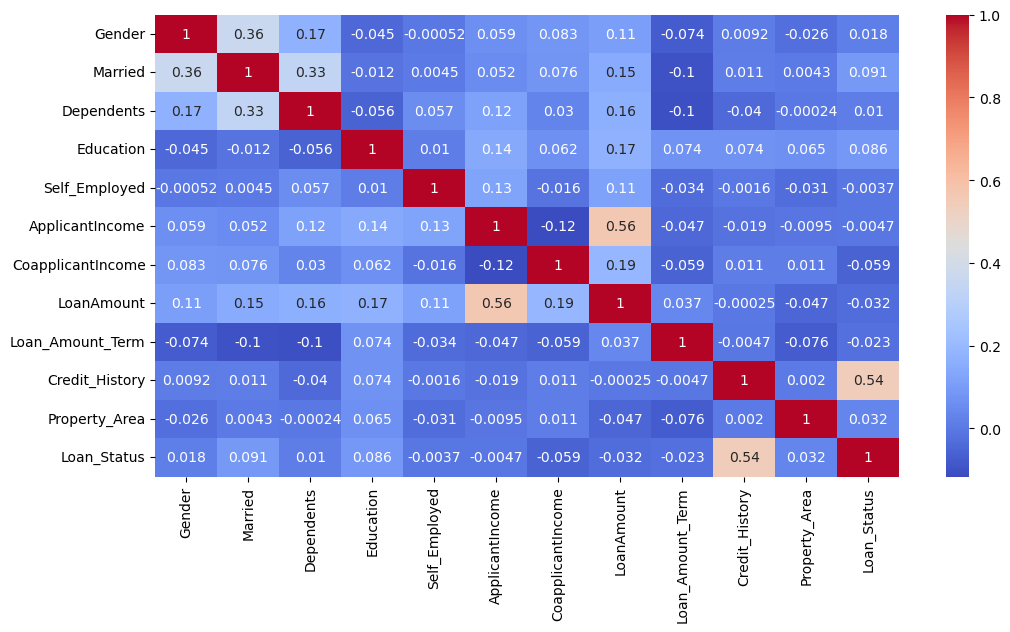

In [613]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df.corr(),annot=True,cmap='coolwarm')

In [614]:
# Plot count of values in 'Loan_status' column.

<Axes: xlabel='Loan_Status', ylabel='count'>

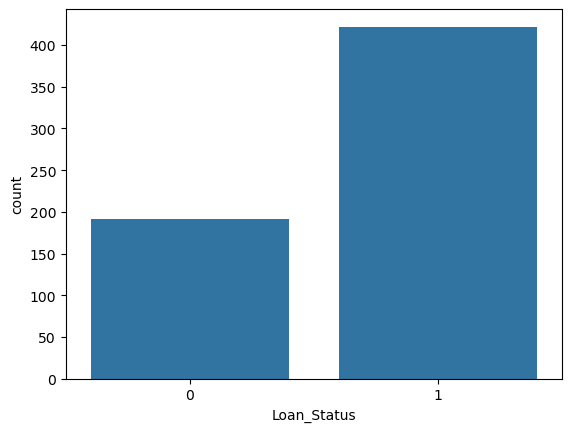

In [615]:
sns.countplot(data=train_df, x="Loan_Status")

<Axes: xlabel='Loan_Status', ylabel='count'>

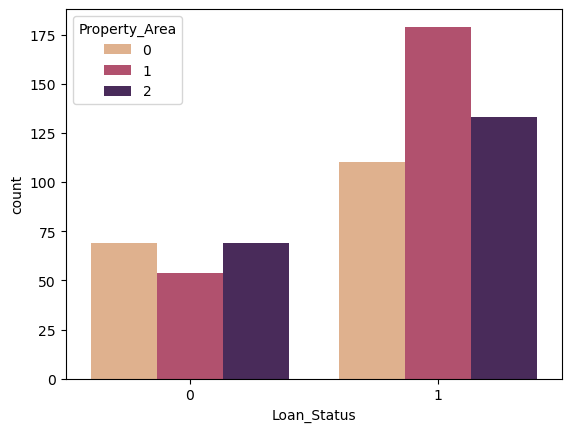

In [616]:
sns.countplot(data=train_df, x="Loan_Status",hue="Property_Area", palette='flare')

<Axes: xlabel='Loan_Status', ylabel='count'>

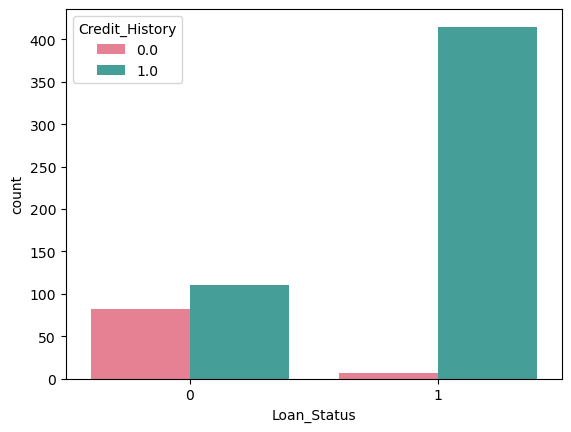

In [617]:
sns.countplot(data=train_df, x="Loan_Status",hue="Credit_History", palette='husl')
#people with accepatable past credit history are most likely accepted to new loan

<Axes: xlabel='Loan_Status', ylabel='count'>

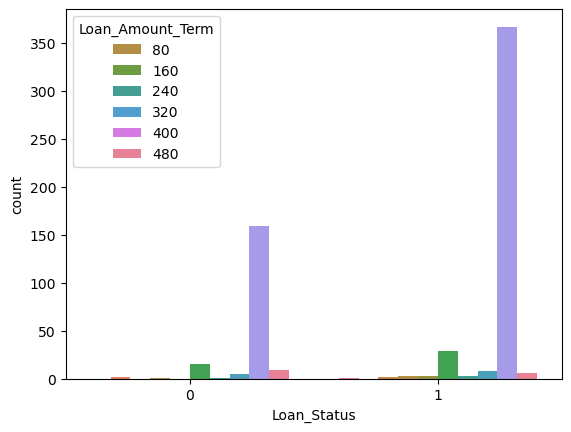

In [618]:
sns.countplot(data=train_df, x="Loan_Status",hue="Loan_Amount_Term", palette='husl')
#people with 360 month loan term are most likely to be acceptable

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

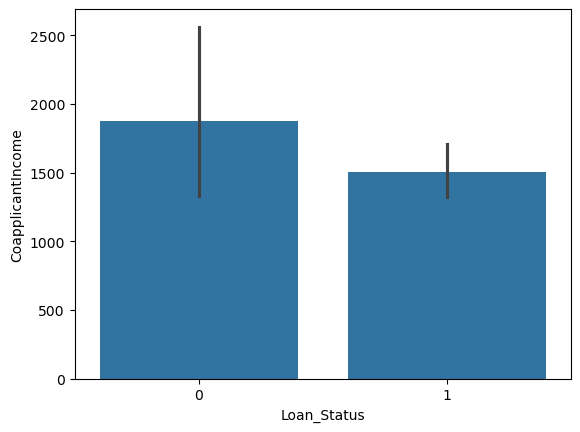

In [619]:
sns.barplot(data=train_df, x="Loan_Status",y="CoapplicantIncome")
# People with high coapplicant income were mostly denied new loans.

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

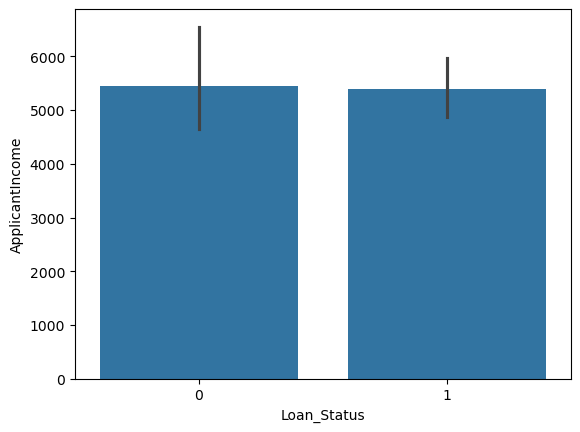

In [620]:
sns.barplot(data=train_df, x="Loan_Status",y="ApplicantIncome")
# As per the 

<Axes: xlabel='Loan_Status', ylabel='count'>

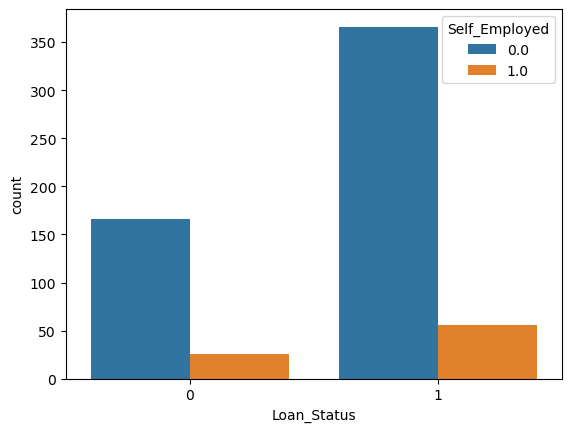

In [621]:
sns.countplot(data=train_df, x="Loan_Status",hue="Self_Employed")

<Axes: xlabel='Loan_Status', ylabel='count'>

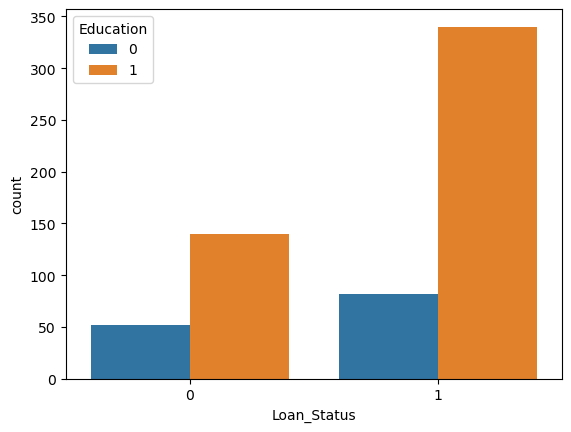

In [622]:
sns.countplot(data=train_df, x="Loan_Status",hue="Education")

<Axes: xlabel='Loan_Status', ylabel='count'>

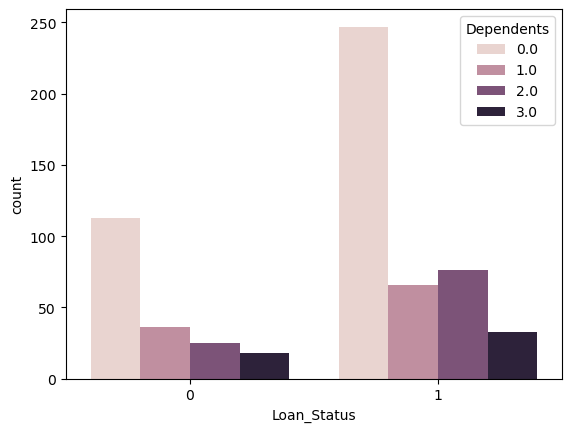

In [623]:
sns.countplot(data=train_df, x="Loan_Status",hue="Dependents")

<Axes: xlabel='Loan_Status', ylabel='count'>

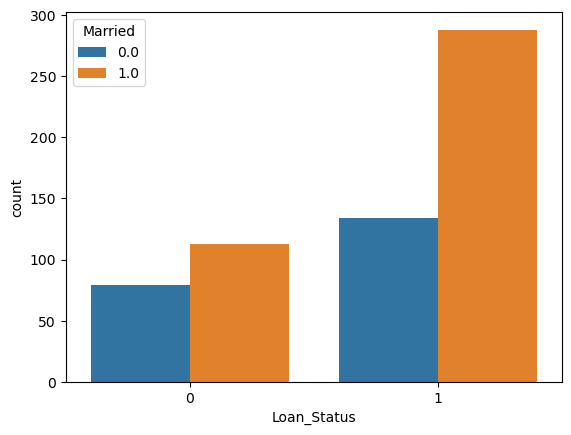

In [624]:
sns.countplot(data=train_df, x="Loan_Status",hue="Married")
#people who are married are more acceptable to new loan

<Axes: xlabel='Loan_Status', ylabel='count'>

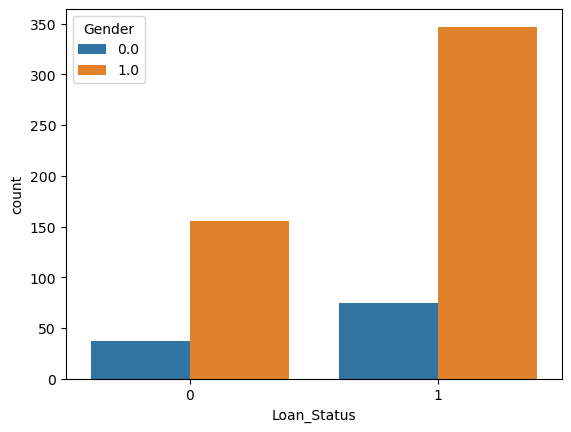

In [625]:
sns.countplot(data=train_df, x="Loan_Status",hue="Gender")

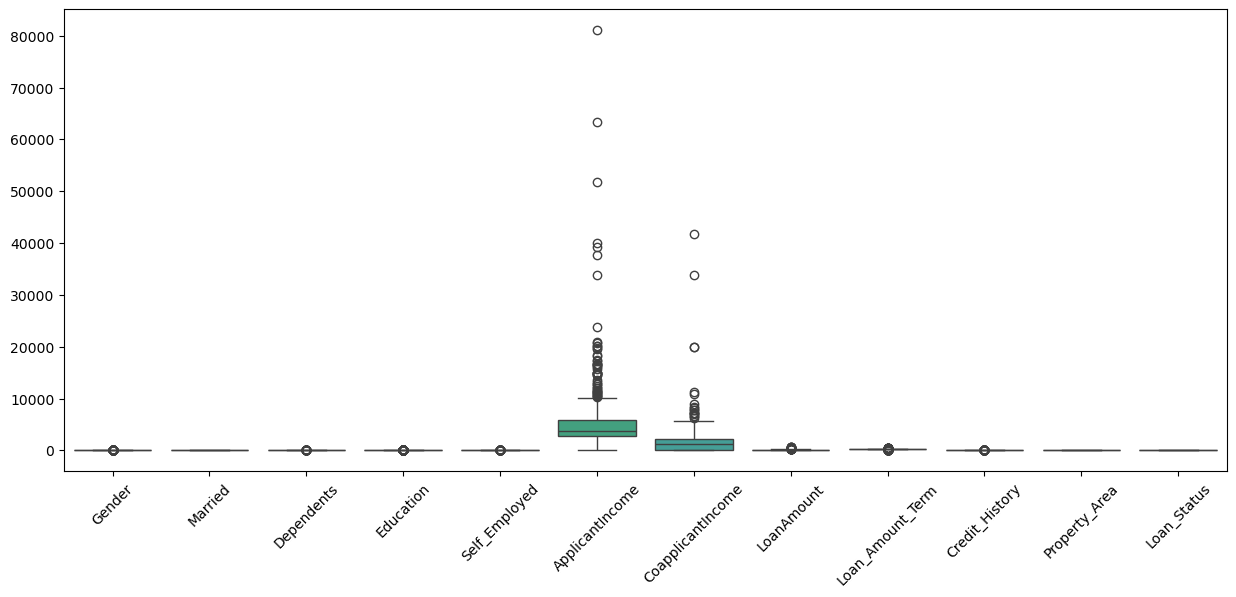

In [626]:
plt.figure(figsize=(15,6))
sns.boxplot(train_df)
plt.xticks(ha='center')
plt.xticks(rotation=45)
plt.show()

# Handling outliers

In [628]:
def remove_outlier(df,col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+1.5*iqr
    lower_bound = q1-1.5*iqr
    df[col_name] = df[col_name].clip(upper = upper_bound)
    df[col_name] = df[col_name].clip(lower = lower_bound)
    return df[col_name]

In [629]:
num_train_df=train_df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']]
for col in num_train_df:
    train_df[col]=remove_outlier(num_train_df,col)

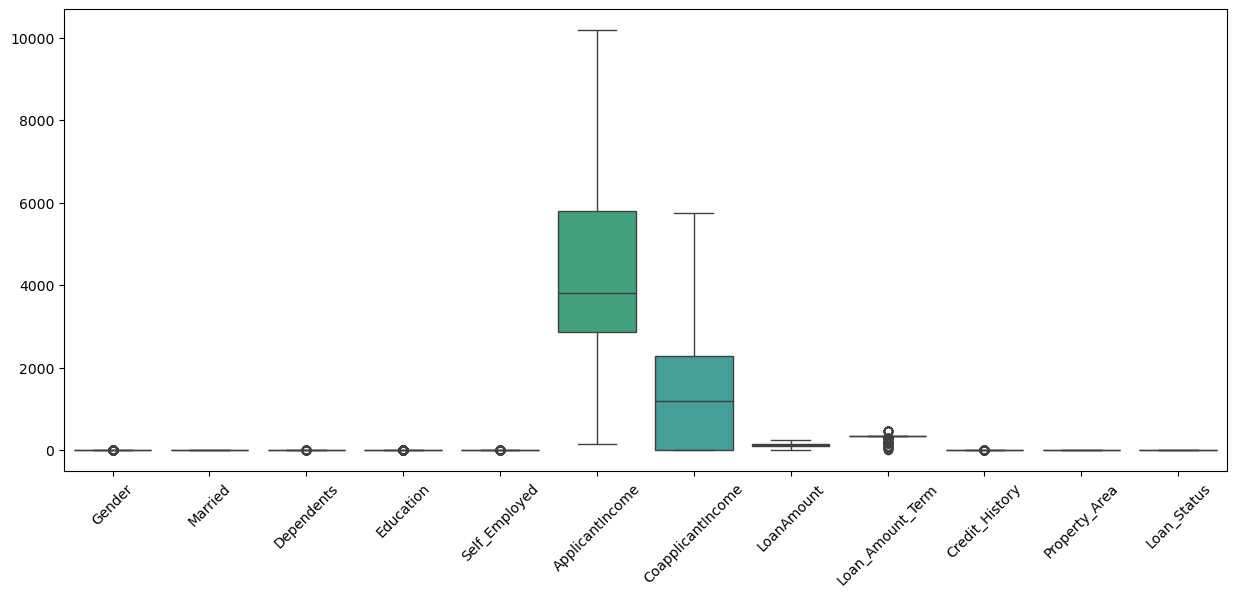

In [630]:
plt.figure(figsize=(15,6))
sns.boxplot(train_df)
plt.xticks(ha='center')
plt.xticks(rotation=45)
plt.show()

# Standard scaling

In [632]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [633]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
std_scale = StandardScaler()

# Fit the scaler on the training data
std_scale.fit(train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

# Transform both the training and test data using the fitted scaler
train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = std_scale.transform(train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
test_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = std_scale.transform(test_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

<Axes: >

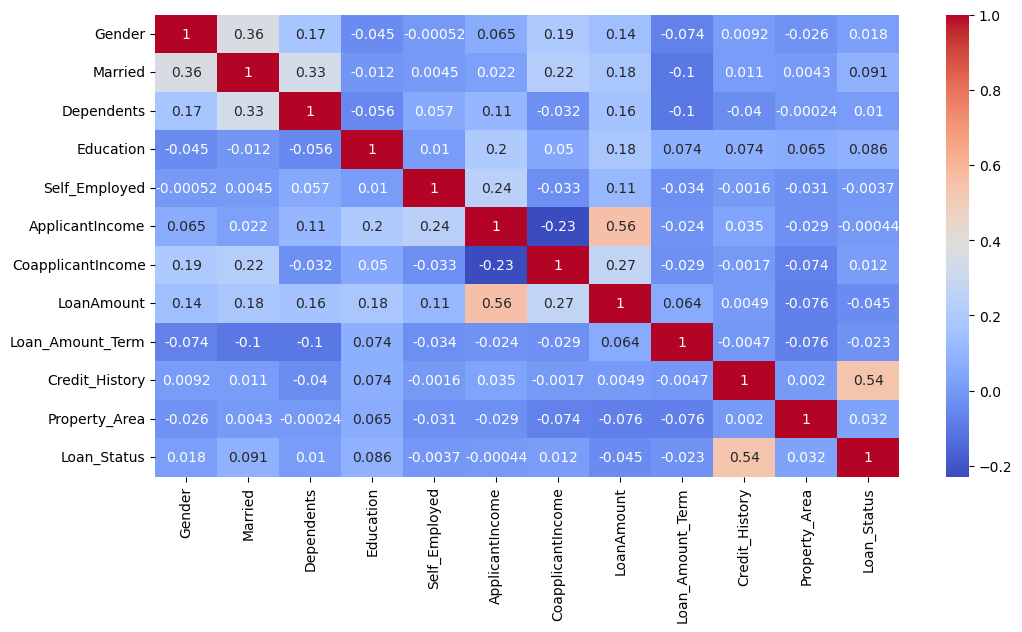

In [634]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df.corr(),annot=True,cmap='coolwarm')

### There is no change in correlation after scaling

In [636]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,0.497164,-0.874587,-0.306063,0.273231,1.0,2,1
1,1.0,1.0,1.0,1,0.0,-0.013767,0.054395,-0.162699,0.273231,1.0,0,0
2,1.0,1.0,0.0,1,1.0,-0.652632,-0.874587,-1.273765,0.273231,1.0,2,1
3,1.0,1.0,0.0,0,0.0,-0.820924,0.578025,-0.306063,0.273231,1.0,2,1
4,1.0,0.0,0.0,1,0.0,0.558104,-0.874587,0.070266,0.273231,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,-0.692990,-0.874587,-1.184163,0.273231,1.0,0,1
610,1.0,1.0,3.0,1,0.0,-0.206274,-0.874587,-1.739696,-2.522836,1.0,0,1
611,1.0,1.0,1.0,1,0.0,1.394319,-0.726739,2.077353,0.273231,1.0,2,1
612,1.0,1.0,2.0,1,0.0,1.196969,-0.874587,0.894605,0.273231,1.0,2,1


# Machine Learning models

In [638]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X=train_df.drop(['Loan_Status'],axis=1)
y=train_df['Loan_Status']

# Create models
log_reg = LogisticRegression() # Create logistic regression model
nb = GaussianNB() #Create a Naive Bayes model
knn = KNeighborsClassifier(n_neighbors=5) # Create a KNN classifier
rf = RandomForestClassifier(n_estimators=100) # Random forest classifier

# Train models
log_reg.fit(X, y)
nb.fit(X, y)
knn.fit(X, y)
rf.fit(X, y)

# Make predictions on the test data
y_pred_log_reg = log_reg.predict(test_df.drop(['Loan_ID'],axis=1))
y_pred_nb = nb.predict(test_df.drop(['Loan_ID'],axis=1))
y_pred_knn = knn.predict(test_df.drop(['Loan_ID'],axis=1))
y_pred_rf = rf.predict(test_df.drop(['Loan_ID'], axis=1))

# we need predictions in Y and N. So let’s convert 1 and 0 to Y and N. 
y_pred_log_reg = np.where(y_pred_log_reg == 1, 'Y', 'N')
y_pred_nb = np.where(y_pred_nb == 1, 'Y', 'N')
y_pred_knn = np.where(y_pred_knn == 1, 'Y', 'N')
y_pred_rf = np.where(y_pred_rf == 1, 'Y', 'N')

### Save result as .csv file

In [640]:
test_df['Loan_Status']=y_pred_log_reg
test_df[['Loan_ID','Loan_Status']].to_csv('loan_Predict_logReg_no_outlier.csv',index=False)

test_df['Loan_Status']=y_pred_nb
test_df[['Loan_ID','Loan_Status']].to_csv('loan_Predict_nb_no_outlier.csv',index=False)

test_df['Loan_Status']=y_pred_knn
test_df[['Loan_ID','Loan_Status']].to_csv('loan_Predict_knn_no_outlier.csv',index=False)

test_df['Loan_Status']=y_pred_rf
test_df[['Loan_ID','Loan_Status']].to_csv('loan_Predict_rf_no_outlier.csv',index=False)

In [641]:
import os
print(os.getcwd())

C:\Users\Jyothy\Downloads\Loan\loan_Prediction_no_outlier


In [642]:
# Created by Jyothy Das